# start_pakistan_correlations
## DR_plotTriggers.ipynb
This script plots the number of annual triggers using the data for Pakistan drought, specifically the 20%ile threshold foer each district and the total Province 25% population threshold. Number of triggers were already calculated using the script "DR_calcTriggers.ipynb".

In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [2]:
# Set the root path
rootPath = Path(Path.cwd()/'data')

## Load the number of annual activations in each province

In [3]:
allTriggers=pd.read_csv(rootPath/'triggers/allDetrendedTriggers.csv', index_col=0)

In [23]:
allTriggers = allTriggers.fillna(0)

## Plot the activations as stacked bar plot

In [37]:
sites=[item.replace('_',' (')+')' for item in sitesFull]
sitesFull=allTriggers.columns.to_list()

In [46]:
colors=[
(68/255,84/255,106/255),    
(254/255,106/255,70/255), 
(133/255,239/255,205/255),
(255/255,192/255,0/255),    
(165/255,165/255,165/255), 
(255/255,193/255,179/255), 
(184/255,193/255,218/255),    
(24/255,186/255,134/255)
]

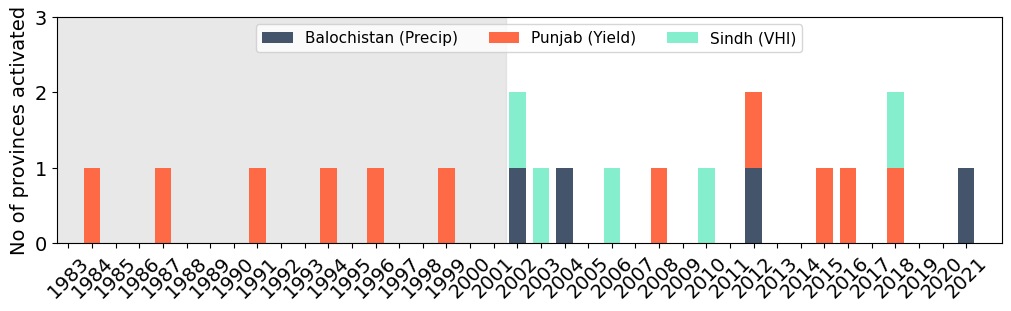

In [57]:
fig, ax = plt.subplots(figsize=(10,3), constrained_layout=True)

# Variable for plotting
width=0.7

# Loop through sites
barPlots=[]
barDatas=[]
for i, site in enumerate(sites):
    barData = allTriggers[sitesFull[i]]
    # Set anything above 1 to 1
    barData[barData>1]=1
    if i==0:
        barPlot = ax.bar(allTriggers.index, barData, width, color=colors[i], zorder=2)
        bottomData = barData
    else:
        barPlot = ax.bar(allTriggers.index, barData, width, bottom=bottomData, color=colors[i], zorder=2)
        bottomData = bottomData+barData
    barPlots.append(barPlot)
    barDatas.append(barData)
    
ax.set_ylabel('No of provinces activated', fontsize=14)
ax.set_xticks(allTriggers.index, allTriggers.index.astype(int), rotation=45, ha='center')
ax.set_yticks(np.arange(0, 4, 1))
ax.legend((barPlot[0] for barPlot in barPlots), (sites), fontsize=11, ncol=len(sites), loc='upper center')
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(1982.5,2022.5)

# Include fill between for period when only Punjab data was availalble
ax.axvspan(1981,2001.5, color='lightgray', alpha=0.5, zorder=1)
    
plt.show()